# Prediccion de Ventas en una Serie de Tiempo

## Forecasting in Time Series

Objetivo: Predecir un año de Ventas dados 6 años de datos, aplicando conceptos de Series de Tiempo y algoritmos de forecasting en Aprendizaje No Supervisado

## Pasos:
### 1. Obtencion de datos
No Aplica, los datos fueron proveidos. 
### 2. Preparar los datos
Los atributos de la data corresponden a un total de 16 atributos, correspondientes a fechas, ventas, y variaciones estadísticas útiles para el fin de este proyecto.


In [4]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from matplotlib.pyplot import figure


In [3]:
# cargamos el conjunto de datos
dataframe = read_csv('base_datos_ventas.csv', sep=';')
dataset = dataframe.columns
print(dataset)

Index(['mes de analisis', 'Año', 'CATEGORIA', 'CANTIDAD_CLASIF_A',
       'ventas_totales_Veh_livianos', 'Tasa de inflación (mensual)',
       'Población Económicamente Activa (Nacional)',
       'Exportaciones totales (USD)',
       'PRODUCTO INTERNO BRUTO (PIB) TRIMESTRAL (MILES DE DOL)',
       'Balanza comercial total (millones de usd)',
       ' Valor Unitario del petroleo Promedio (eje der.) ',
       'EXPORTACIONES PETROLERAS (miles de USD) FOB (der)',
       'Import. CIF MILLONES USD', 'Exp. no petroleras MILLONES USD',
       'IMPORTACIONES Petroleras', 'IMPORTACIONES No Petroleras'],
      dtype='object')


Para seguir el proceso, se necesita entender los atributos y sus variaciones, por tanto se muestra a continuacion las graficas de los atributos en los cuales el negocio tiene una afeccion directa (CANTIDAD_CLASIF_A, Ventas de vehiculos livianos, Tasa Inflacion). Los demás atributos no, ya que no dependen directamente del negocio, sino del variables que dicta la situacion del pais.

#### Gráficas de cada atributo a travez del tiempo

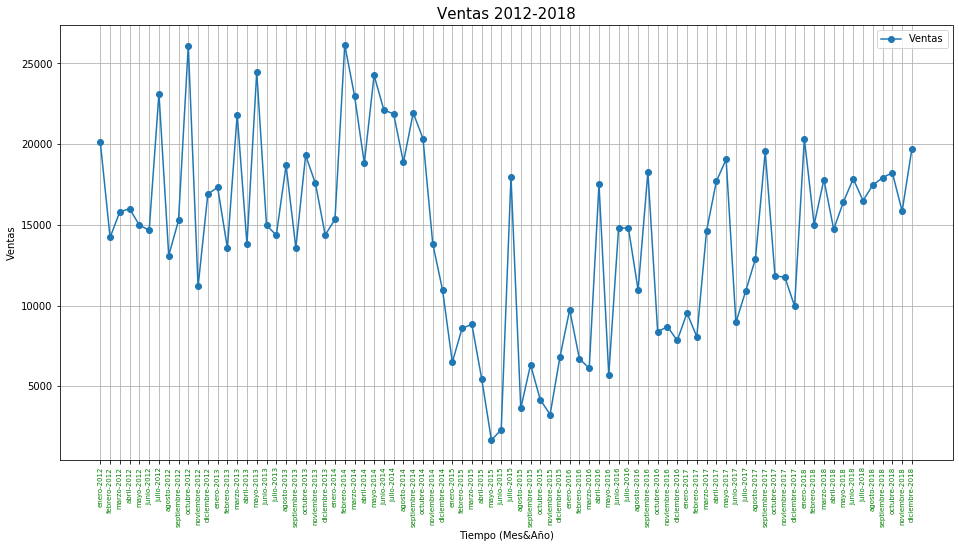

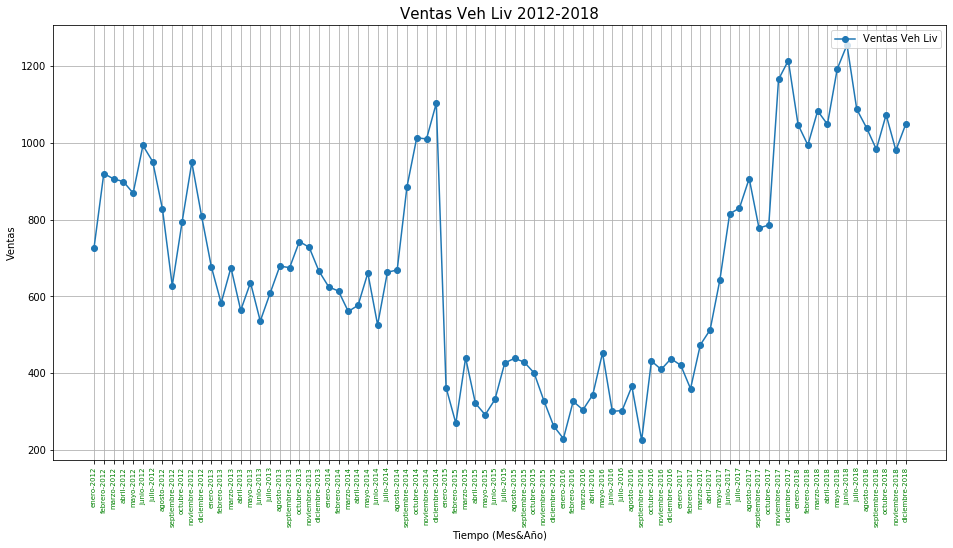

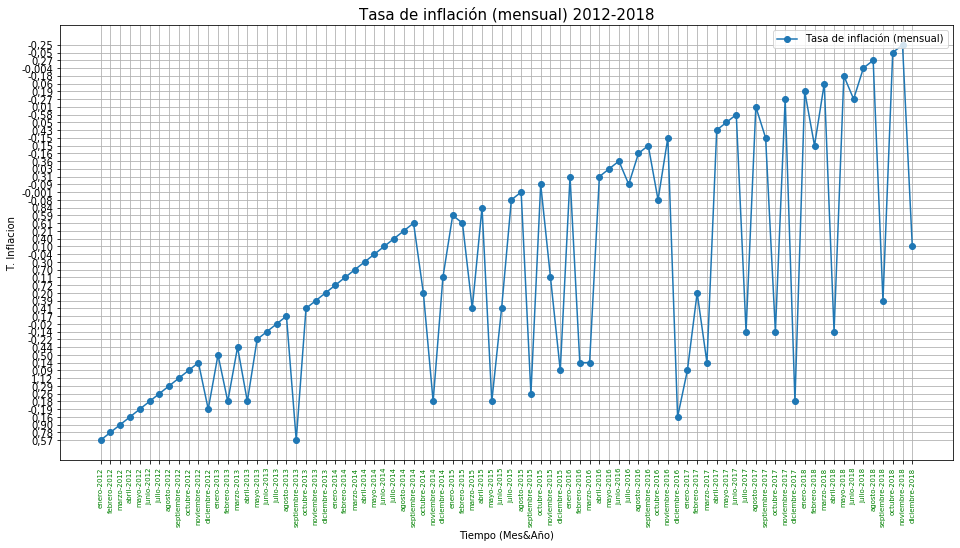

In [12]:
def graficaAtributo(atributo,nombreLeyenda,titulo,xetiqueta,yetiqueta,nombreArchivo):
    figure(figsize=(16,8))
    dataframe['mes de analisis'] = dataframe['mes de analisis'].astype(str)
    dataframe['Año'] = dataframe['Año'].astype(str)
    plt.plot(dataframe['mes de analisis']+'-'+dataframe['Año'], dataframe[atributo], "-o")
    plt.legend([nombreLeyenda], loc = 'upper right')
    plt.grid(True)
    plt.title(titulo, fontsize = 15)
    plt.xlabel(xetiqueta, fontsize = 10)
    plt.ylabel(yetiqueta, fontsize = 10)
    plt.xticks(fontsize=7, color = 'g', rotation = 90) 
    plt.savefig(nombreArchivo, dpi=300)
#Grafica del atributo a predecir
graficaAtributo('CANTIDAD_CLASIF_A','Ventas',"Ventas 2012-2018","Tiempo (Mes&Año)","Ventas",'ventasGrafica.svg')
#Grafica de Venta de Vehiculos livianos
graficaAtributo('ventas_totales_Veh_livianos','Ventas Veh Liv',"Ventas Veh Liv 2012-2018","Tiempo (Mes&Año)","Ventas",'ventas_totales_Veh_livianos.svg')
#Grafica de Venta de Vehiculos livianos
graficaAtributo('Tasa de inflación (mensual)','Tasa de inflación (mensual)',"Tasa de inflación (mensual) 2012-2018","Tiempo (Mes&Año)","T. Inflacion",'t_inflacion.svg')



##### Se debe reducir la dimensionalidad de los datos, evitando atributos innecesarios (aplicacion de PCA)
El atributo Categoria no muestra valores influyentes en nuestra data, se mantiene el valor "A", si el modelo a entrenar toma en cuenta este atributo, se malgastarian recursos. El atributo Mes y Año se unen en un solo atributo, ya que al ser una serie de tiempo, estos dos fijan los demas valores a un solo valor en el tiempo.

- Separacion de datos segun la Regla de Pareto 80/20.
3. Elegir el modelo
4. Entrenar nuestra máquina
5. Evaluación
6. Parameter Tuning (configuración de parámetros)
7. Predicción o Inferencia